<h1 align='center'> <b> NETFLIX MOVIE AND TV SHOW RECOMMENDATION SYSTEM - HỆ THỐNG GỢI Ý PHIM VÀ CHƯƠNG TRÌNH TRUYỀN HÌNH NETFLIX </b> </h1>



<p align='center'><img src='https://api.mirada.com/wp-content/uploads/2022/07/netflix-logo.gif' width="600" height ='400' /></p>

**Nguồn bộ dữ liệu**: [Kaggle](https://www.kaggle.com/datasets/victorsoeiro/netflix-tv-shows-and-movies)

**Thành viên thực hiện**

*   20280053: Cao Huỳnh Anh Khoa
*   20280057: Phan Tiến Kỳ
*   20280081: Nguyễn Văn Sơn
*   20280099: Trần Minh Tiến


**Tổng quan dự án** <br>
 

1. Data Collection
2. Data Visualization
3. Data Preprocessing
4. Modeling
5. Evaluation
6. Deployment
 

Tutorial:
+ https://www.kaggle.com/code/mfaaris/netflix-recommendation-both-movie-and-tv-show
+ https://viblo.asia/p/xay-dung-content-based-filtering-rs-recommender-system-co-ban-phan-2-bWrZnVovZxw
+ https://viblo.asia/p/tong-quan-ve-recommender-system-recommender-system-co-ban-phan-1-924lJGBb5PM

#**1. Data Collection**

**Các thư viện cần thiết**

In [2]:
!pip install country_converter
!pip install geopandas

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import country_converter as coco
import seaborn as sns
import string
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import TfidfVectorizer
pd.options.mode.chained_assignment = None  



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 KB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for country_converter: filename=country_converter-0.8.0-py3-none-any.whl size=55657 sha256=968e68a37027e82a85edeb07abfc97562ed005eb7de13359ac214d8d05f23da6
  Stored in directory: /root/.cache/pip/wheels/c2/5a/f6/7187fa51e18f2ed105833a7f5c44a2475ace0c96e19118e608
Successfully built country_converter
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 72.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 60.0 MB/s eta 0:00:00


**DATASET**

**Đọc dữ liệu csv vào `movie_data`**

In [3]:
movie_data = pd.read_csv("https://raw.githubusercontent.com/tientran0826/Netflix-movie-and-TV-show-recommendation/main/dataset/netflix_titles.csv")

**Trả về 5 dòng đầu tiên để kiểm tra nhanh các đối tượng có đúng dữ liệu hay không?**

In [4]:
movie_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**Kiểm tra thông tin toàn bộ dữ liệu**

In [5]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


* Dataframe có `8807` **dòng** và `12` **cột** 

* Dữ liệu một vài feature bị thiếu tuy nhiên vẫn không ảnh hưởng đáng kể đến model

**Trích xuất những feature quan trọng cho việc training model**

In [6]:
df = movie_data[['title', 'type', 'director', 'cast', 'rating', 'listed_in', 'description']]
df.head()

,title,type,director,cast,rating,listed_in,description
0,Dick Johnson Is Dead,Movie,Kirsten Johnson,NaN,PG-13,Documentaries,"As her father nears the end of his life, filmm..."
1,Blood & Water,TV Show,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,Ganglands,TV Show,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,Jailbirds New Orleans,TV Show,NaN,NaN,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,Kota Factory,TV Show,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#**2. Data Visualization**

**Biểu đồ minh họa số lượng phim được ra mắt trong từng năm từ năm 1990 đến năm 2021**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1080x864 with 0 Axes>

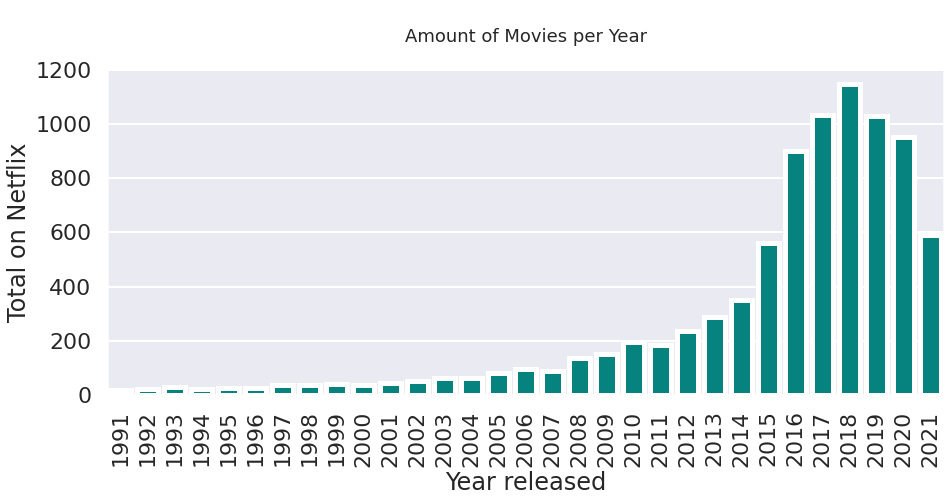

In [7]:
#Định dạng figure
plt.figure(figsize=(15,12))
sns.set_theme()
sns.set_context("poster")


#Đặt tên tiêu đề, trục hoành, trục tung
#Giới hạn trục hoành do dataset chỉ đến năm 2021
plt.figure(figsize=(15,6))
plt.title('\nAmount of Movies per Year\n', fontsize=18)
sns.countplot(movie_data[movie_data.release_year>1990].release_year, lw = 5, 
              color='#fdc100', 
              facecolor='#06837f')
plt.xticks(rotation=90)
plt.xlabel("Year released")
plt.ylabel("Total on Netflix")
plt.show()


**Bản đồ minh họa số lượng phim được sản xuất của mỗi quốc gia**

In [8]:
#trích xuất cột tilte và country không chứa dòng không có data
country_data = movie_data[["title", "country"]]
country_data.dropna(inplace=True)


#định dạng lại cột country 
#phim thuộc nhiều quốc gia sẽ được biểu diễn thành nhiều dòng tương ứng cho từng quốc gia thay vì 1 dòng
#với mỗi dòng chỉ chứa 1 title và 1 quốc gia
country_data["country"] = country_data["country"].map(str)
country_data["country"] = country_data["country"].str.split(", ")
country_df = country_data.explode("country")


country_df.head()


,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
4,Kota Factory,India
7,Sankofa,United States
7,Sankofa,Ghana


In [9]:
#chuyển đổi tên các quốc gia theo kiểu IS03
country_df["country"]=coco.convert(names=country_df["country"], to="ISO3");
country = country_df["country"].value_counts()
country.sort_values(ascending=True, inplace=True)

In [10]:
#vẽ biểu đồ thế giới cho thấy được các quốc gia nào đã cho ra mắt được bao nhiêu bộ phim
fig=px.choropleth(locations=country.index,
                  color=country.values,
                  color_continuous_scale="Burgyl",
                  title='Distribution of movie production by countries')

#Đặt tên cho color bar title
fig.layout.coloraxis.colorbar.title = "Number of the movies"
#Thay đổi font chữ và size chữ
fig.update_layout(font=dict(size=20, family="Franklin Gothic"))

fig.show()

**Mỹ** dẫn đầu với tổng số `3690` bộ phim được sản xuất. 

Sau đó, lần lượt là **Ấn Độ** và **Anh** với `1046` và `806` bộ phim

#**3. Data Preprocessing**

In [11]:
df.head()

,title,type,director,cast,rating,listed_in,description
0,Dick Johnson Is Dead,Movie,Kirsten Johnson,NaN,PG-13,Documentaries,"As her father nears the end of his life, filmm..."
1,Blood & Water,TV Show,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,Ganglands,TV Show,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,Jailbirds New Orleans,TV Show,NaN,NaN,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,Kota Factory,TV Show,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Kiểm tra dữ liệu ta có thể thấy rằng các dữ liệu NaN tồn tại khá nhiêu trong dataset

In [12]:
# Thay thế các giá trị NA bằng ô trống
df.fillna('', inplace=True)

Tiếp đến ta tiến hành xây dựng các hàm xử lý những dữ liệu dạng text bằng cách thay thế tách các đoạn văn , xoá những kí tự đặc biệt và xoá bỏ khoảng trắng.

In [13]:
def separate(texts): #Tách cách các riêng biệt bởi dấu phẩy và xoá khoảng trắng
    t = []
    for text in texts.split(','):
        t.append(text.replace(' ', '').lower())
    return ' '.join(t)

def remove_space(texts): #Xoá khoảng trắng
    return texts.replace(' ', '').lower()

def remove_punc(texts): #Xóa dấu chấm câu
    return texts.translate(str.maketrans('','',string.punctuation)).lower()

In [14]:
def remove_special_characters(df):  
    """
       Hàm chuẩn hoá text cho dataset 
       áp dụng các hàm đã được xây dựng ở trên.
    """ 
    df['type'] = df['type'].apply(remove_space)
    df['director'] = df['director'].apply(separate)
    df['cast'] = df['cast'].apply(separate)
    df['rating'] = df['rating'].apply(remove_space)
    df['listed_in'] = df['listed_in'].apply(separate)
    df['description'] = df['description'].apply(remove_punc)

    return df

In [15]:
def combine_columns(df):  # Hàm gộp các cột thành một cột duy nhất
    df['bag_of_words'] = ''
    df.drop(['title'],inplace=True,axis=1)
    for i, row in enumerate(df.iterrows()):
        string = ''
        for col in df.columns:
            if row[1][col] == '':
                continue
            else:
                string += row[1][col] + ' '
                df['bag_of_words'][i] = string.strip()

    # Vì đã gộp các cột trong cột "bag_of_words" nên drop bỏ các cột trước đó
    df.drop(df.columns[0:-1], axis=1, inplace=True)
    return df

#**4. Modelling**

In [16]:
def tfidf_matrix(movies):
    """
            Hàm chuyển text sang ma trận Tfidf cho việc tính toán model
    """
    tf = TfidfVectorizer()
    new_tfidf_matrix = tf.fit_transform(movies['bag_of_words'])
    return new_tfidf_matrix

In [17]:
def cosine_sim(matrix):
    """
            Dùng hàm "linear_kernel" để tạo thành ma trận hình vuông với số hàng và số cột là số lượng film
            để tính toán điểm tương đồng giữa từng bộ phim với nhau
    """
    return linear_kernel(matrix, matrix)

In [18]:
class Content_Based_Recommendation():

    def __init__(self, movies_csv):
        #Khởi tạo dataset cho việc training
        self.training_movies = movies_csv.copy()
        
        #Khởi tạo dataset cho việc trích xuất kết quả sau khi training
        self.movies = movies_csv[['title','type','listed_in','description']]

        #Khởi tạo ma trận tfidf rỗng
        self.tfidf_matrix = None

        #Ma trận điểm tương đồng rỗng
        self.cosine_sim = None

    def get_Movies(self):
        return self.movies

    def get_training_Movies(self):
        return self.training_movies

    def get_TFIDF_Matrix(self):
        return self.get_tfidf_matrix

    def get_Consine_Sim(self):
        return self.get_consine_sim



    def build_Model(self):
        # Xử lý dữ liệu đầu vào 
        self.training_movies =  remove_special_characters(self.training_movies)

        # Gộp các cột text training thành một 
        self.training_movies = combine_columns(self.training_movies)

        # Tính toán ma trận Cosine similarity
        self.tfidf_matrix = tfidf_matrix(self.training_movies)
        self.cosine_sim = cosine_sim(self.tfidf_matrix)



    def movie_recommendations(self, title, top_x):
        """
          Title là tên movie hoặc show được chọn
          Top_x là số phim cần lấy có điểm tương đồng từ cao xuống thấp
          // VD: Top_x = 5 , lấy 5 phim có điểm tương đồng cao nhất với phim cần biết
        """
        # Trích xuất tên phim từ dataset
        titles = self.movies['title']

        # Trích xuất phim và gán số thứ tự cho từng phim
        indices = pd.Series(self.movies.index, index=self.movies['title'])

        # Lấy giá trị index của tựa phim đang chọn
        idx = indices[title]

        # Lấy ma trận cosine similarity đã được tính
        sim_scores = self.cosine_sim

        # Trích xuất điểm tương đồng của phim cần tìm bằng "sim_scores[idx]",
        # kết quả sẽ trả về một array mà giá trị tương ứng là số điểm tương đồng của từng phim với phim đang xét.
        # Sau đó ta đánh index tương ứng với số điểm từng phim so với phim đang xét
        sim_score_results = pd.DataFrame(enumerate(sim_scores[idx]),columns = ['index','sim_score'])

        # Tạo một cột điểm số tương đồng với phim đang xét trong dataset gốc để thuận tiện cho việc xem kết quả
        self.movies['Cosine Similarity Score'] = sim_score_results['sim_score']

        # Sắp xếp các trị trong sim score của phim đang xét theo thứ tự từ lớn xuống nhỏ
        sim_score_results.sort_values(by = 'sim_score',ascending=False,inplace=True,ignore_index=True)

        # Lấy giá trị index của top_x có giá trị cosine similarity cao nhất (bỏ index 0 vì index 0 luôn là phim đang xét (tương đồng với chính nó cao nhất))
        index_results = sim_score_results['index'].iloc[1:top_x+1]

        # Trả về top_x giá trị cần tìm dụa trên dataset được tạo để trích xuất
        return self.movies.iloc[index_results] 


In [19]:
# Khởi tạo instance Content_Based_Recommendation với dataset
Model = Content_Based_Recommendation(df)

In [20]:
# Kiểm tra dataset nhập vào
Model.get_Movies()

,title,type,listed_in,description
0,Dick Johnson Is Dead,Movie,Documentaries,"As her father nears the end of his life, filmm..."
1,Blood & Water,TV Show,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,Ganglands,TV Show,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,Jailbirds New Orleans,TV Show,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,Kota Factory,TV Show,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...
8802,Zodiac,Movie,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,Zombie Dumb,TV Show,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,Zombieland,Movie,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,Zoom,Movie,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [21]:
# Tiến hành gọi method build_model() để xử lý dataset và tính toán cosine similarity
Model.build_Model()

In [22]:
# Dữ liệu sau khi được xử lý
Model.get_training_Movies()

,bag_of_words
0,movie kirstenjohnson pg-13 documentaries as he...
1,tvshow amaqamata khosingema gailmabalane thaba...
2,tvshow julienleclercq samibouajila tracygotoas...
3,tvshow tv-ma docuseries realitytv feuds flirta...
4,tvshow mayurmore jitendrakumar ranjanraj alamk...
...,...
8802,movie davidfincher markruffalo jakegyllenhaal ...
8803,tvshow tv-y7 kids'tv koreantvshows tvcomedies ...
8804,movie rubenfleischer jesseeisenberg woodyharre...
8805,movie peterhewitt timallen courteneycox chevyc...


#**5. Predicting model and conclusion**


Trích xuất 5 phim tương đồng với *Stranger Things*

In [23]:
Model.movie_recommendations(title='Stranger Things',top_x = 5)

,title,type,listed_in,description,Cosine Similarity Score
5200,Beyond Stranger Things,TV Show,"Stand-Up Comedy & Talk Shows, TV Mysteries, TV...","Secrets from the ""Stranger Things 2"" universe ...",0.472092
2190,The Umbrella Academy,TV Show,"TV Action & Adventure, TV Mysteries, TV Sci-Fi...","Reunited by their father's death, estranged si...",0.097970
241,Manifest,TV Show,"TV Dramas, TV Mysteries, TV Sci-Fi & Fantasy",When a plane mysteriously lands years after ta...,0.095616
1240,Safe Haven,Movie,"Dramas, Romantic Movies",When a mysterious woman arrives in a small Nor...,0.092946
1127,Prank Encounters,TV Show,"Reality TV, TV Comedies, TV Horror",Monstrous frights meet hilarious reveals on th...,0.089413


Trích xuất 5 phim tương đồng với *Terminator 3: Rise of the Machines*

In [24]:
Model.movie_recommendations(title='Terminator 3: Rise of the Machines',top_x = 5)

,title,type,listed_in,description,Cosine Similarity Score
8167,Terminator Salvation,Movie,"Action & Adventure, Sci-Fi & Fantasy","All grown up in post-apocalyptic 2018, John Co...",0.094016
2317,Total Recall,Movie,"Action & Adventure, Sci-Fi & Fantasy","After getting a memory implant, working stiff ...",0.091030
4812,TAU,Movie,"Sci-Fi & Fantasy, Thrillers",Kidnapped by an inventor who uses her as a tes...,0.087653
8512,The Space Between Us,Movie,"Action & Adventure, Romantic Movies, Sci-Fi & ...","After years of limited contact with Earth, an ...",0.086262
8035,Skyline,Movie,"Action & Adventure, Sci-Fi & Fantasy","After a wild night of partying, Terry discover...",0.080732


**Kết luận:** 

-	Với top_x = 5, kết quả trả về là 5 bộ phim có mức điểm tương đồng cao nhất.
-	Các phim được trả về có mức điểm cosine similarity khá thấp (với các phim tương đồng với Terminator 3) , lý do vì nội dung các phim khác nhau không thế nào giống nhau mà chỉ tương đồng một phần về nội dung và thế loại ( không nội dung 2 phim có sự tương đồng quá lớn). 
-	Trong lần tìm kiếm Stranger Things xuất hiện bộ phim Beyond Stranger Things có điểm số tương đồng trên 45% là vì trong phần description của bộ phim Beyond Stranger Things đã có nhắc tới bộ phim Stranger Things .Vậy có kết luận được rằng trong quá trình xử lý dataset và kết quả trả về nói lên rằng nội dung trong cột “description” chiếm ưu thế  trong phần dữ liệu training nên khi đưa ra khuyến nghị cho người dùng thì model sẽ nghiêng về đưa những phim có phần "description" tương đồng trước sau đó đến các cột còn lại.


**Xử lý kết quả trả về với hình ảnh poster đính kèm**

In [25]:
from skimage import io
import matplotlib.pyplot as plt
import json
import requests

In [26]:
API_KEY = 'OYWwbgYOBRkBcHhwTTo0NCO7HHrsyTRO'

In [27]:
session = requests.Session()
def get_link_movie(title): # Lay poster hinh anh tu API
    url = "https://api.apilayer.com/unogs/search/titles"

    params={
        'title':title,
        'limit': 1
    }
    headers= {
        'apikey':API_KEY ,
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36'
    }
    img_link = 'https://raw.githubusercontent.com/tientran0826/Netflix-movie-and-TV-show-recommendation/main/imgs/poster-holder.jpg'
    response = session.request("GET", url, headers=headers,params=params,stream=True)
    data = json.loads(response.text)
    results = data["results"]
    if results:
        result = results[0]
        if result["title"] == title:
            img_link = result["img"]
    return str(img_link)

In [28]:
def get_recommendation_with_images(CTB,title):
    data = CTB.movie_recommendations(title=title,top_x = 5)
    titles = data[0:5]['title']
    plt.rcParams["figure.figsize"] = [7.50, 3.50]
    plt.rcParams["figure.autolayout"] = True
    fig, axes = plt.subplots(1, 5, figsize=(15,4))  
    for i in range(5):
      poster_link = get_link_movie(str(titles.iloc(0)[i]))
      a = io.imread(poster_link)
      axes[i].imshow(a)
      axes[i].axis('off')
    plt.show()

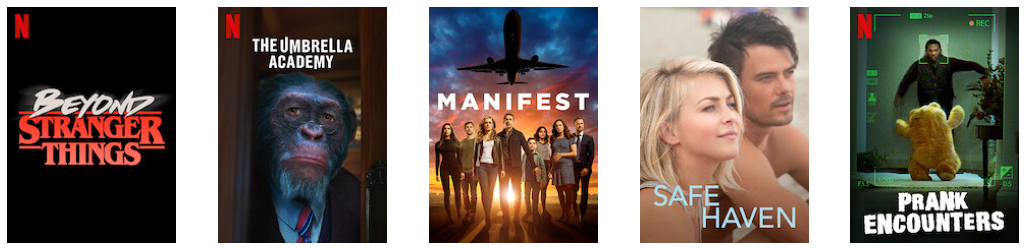

In [29]:
get_recommendation_with_images(Model,'Stranger Things')

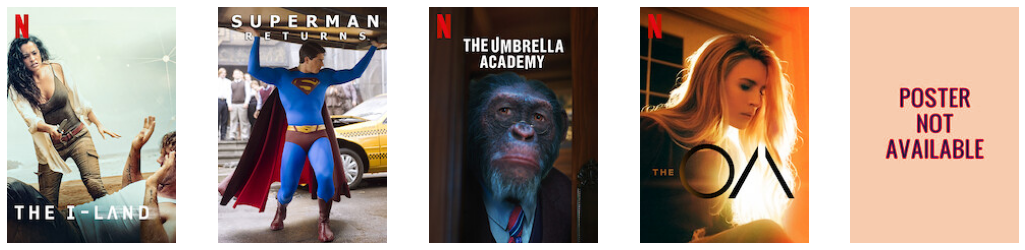

In [30]:
get_recommendation_with_images(Model,'Manifest')

#**7. Deployment**


Tiến hành save lại kết quả đã training và dataset dưới dạng file .pkl

In [31]:
import pickle

pickle.dump(Model.movies,open('movie_list.pkl','wb'))
pickle.dump(Model.cosine_sim,open('similarity.pkl','wb'))

Tiến hành tải file model đã lưu về máy

In [32]:
from google.colab import files
files.download('movie_list.pkl')
# Kich thuoc file similarity se kha lon vi la ma tran chua ket qua tinh toan co kich co hon 8000 x 8000
files.download('similarity.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Phần web được xây dựng trên thư viện **streamlit** và sử dụng API hình ảnh poster từ Unogs: 

*   [App Code](https://github.com/tientran0826/Netflix-movie-and-TV-show-recommendation/blob/main/app.py)
*   [Full Source Code](https://github.com/tientran0826/Netflix-movie-and-TV-show-recommendation)
* [Demo](https://tientran08263-netflix-recommendation-deploy-app-n17dck.streamlit.app/)


![Demo](https://raw.githubusercontent.com/tientran0826/Netflix-movie-and-TV-show-recommendation/main/imgs/demo.png)